# 一些不愉快的货币主义算术

## 概述

本讲座建立在 {doc}`money_inflation` 中介绍的概念和问题基础上。

在那个讲座中，我们探讨了通货膨胀税率及其相关货币收益率的[*拉弗曲线*](https://baike.baidu.com/item/%E6%8B%89%E5%BC%97%E6%9B%B2%E7%BA%BF/2527248)上的静态均衡点。

本讲中，我们将研究一个特殊情况：某个静态均衡只在时间 $T > 0$ 之后才成为主导状态。

在 $t=0, \ldots, T-1$ 期间，货币供应、价格水平和计息政府债务会沿着一条过渡路径演变，直到 $t=T$ 时结束。

在这个过渡期内，实际货币余额 $\frac{m_{t+1}}{p_t}$ 与到期的一期政府债券 $\tilde{R} B_{t-1}$ 之间的比率会逐期下降。

这种变化对于 $t \geq T$ 时期必须通过印钞来融资的政府**总利息赤字**产生了重要影响。

关键的**货币与债券比率**只有在时间 $T$ 及之后才会稳定下来。

而且，$T$ 越大，在 $t \geq T$ 时期必须通过印钞融资的政府总利息赤字就越大。

这些发现构成了萨金特和华莱士(Sargent and Wallace)在"不愉快的货币主义算术"一文中的核心论点 {cite}`sargent1981`。

前一讲座已经介绍了本讲中使用的货币供应和需求模型，并描述了我们在本讲中将通过逆向推导得出的稳态均衡。

除了学习"不愉快的货币主义算术"外，本讲座还将教授如何实现一个用于计算初始价格水平的[*不动点*](https://baike.baidu.com/item/%E4%B8%8D%E5%8A%A8%E7%82%B9/8535695)算法。

## 设置

让我们首先回顾 {doc}`money_inflation` 中的模型设定。

如有需要，请参考那篇讲义并查看我们将在本讲中继续使用的Python代码。

对于 $t \geq 1$，**实际货币余额**的变化遵循以下方程：

$$
\frac{m_{t+1}}{p_t} - \frac{m_{t}}{p_{t-1}} \frac{p_{t-1}}{p_t} = g
$$

或者

$$
b_t - b_{t-1} R_{t-1} = g
$$ (eq:up_bmotion)

其中

* $b_t = \frac{m_{t+1}}{p_t}$ 是第 $t$ 期末的实际余额
* $R_{t-1} = \frac{p_{t-1}}{p_t}$ 是从 $t-1$ 到 $t$ 期间实际余额的毛收益率

对实际余额的需求是

$$
b_t = \gamma_1 - \gamma_2 R_t^{-1} .
$$ (eq:up_bdemand)

其中 $\gamma_1 > \gamma_2 > 0$.

## 货币与财政政策

在{doc}`money_inflation`的基础模型基础上，我们引入了一期通胀指数化政府债券，作为政府筹集财政资金的另一种渠道。

假设 $\widetilde R > 1$ 是政府一期通胀指数化债券的固定实际回报率。

有了这个额外的融资工具，政府在时间 $t \geq 0$ 的预算约束可以表示为

$$
B_t + \frac{m_{t+1}}{p_t} = \widetilde R B_{t-1} + \frac{m_t}{p_t} + g
$$ 

在模型开始前，公众持有两种资产：$\check m_0$ 单位的货币（以美元计）和价值 $\widetilde R \check B_{-1}$ 的一期指数化债券（以时间 $0$ 的商品计量）。

这两个数值作为模型的初始条件给定。

值得注意的是，$\check m_0$ 是一个*名义*变量（以美元计），而 $\widetilde R \check B_{-1}$ 是一个*实际*变量（以商品计量）。

### 公开市场操作

在时间 $0$ 时，政府可以调整其债务结构，但必须遵循以下公开市场操作约束：

$$
\widetilde R B_{-1} + \frac{m_0}{p_0} = \widetilde R \check B_{-1} + \frac{\check m_0}{p_0}
$$

或

$$
B_{-1} - \check B_{-1} = \frac{1}{p_0 \widetilde R} \left( \check m_0 - m_0 \right)  
$$ (eq:openmarketconstraint)

该方程表明，政府（特别是中央银行）可以通过增加债券持有量（$B_{-1}$ 相对于 $\check B_{-1}$）来减少货币供应（$m_0$ 相对于 $\check m_0$），反之亦然。

这实际上描述了中央银行的[**公开市场操作**](https://www.federalreserve.gov/monetarypolicy/openmarket.htm)——一种货币政策工具，通过买卖政府债券来调节经济中的货币供应量。当中央银行购买政府债券时，它向经济注入资金；当出售债券时，则从流通中收回资金。

## 初始公开市场操作的影响

我们将按照萨金特和华莱士 {cite}`sargent1981` 的分析框架，探讨一个关键问题：在面对持续性财政赤字（即正值 $g$）时，中央银行能否通过公开市场操作有效地控制物价水平？

在模型的初始阶段（$t=0$ 之前），政府需要决定初始货币供应量和债券水平 $(m_0, B_{-1})$，同时遵守公开市场操作约束条件 {eq}`eq:openmarketconstraint`。

对于 $t =0, 1, \ldots, T-1$，

$$
\begin{aligned}
B_t & = \widetilde R B_{t-1} + g \\
m_{t+1} &  = m_0 
\end{aligned}
$$

而对于 $t \geq T$，

$$
\begin{aligned}
B_t & = B_{T-1} \\
m_{t+1} & = m_t + p_t \overline g
\end{aligned}
$$

其中 

$$
\overline g = \left[(\widetilde R -1) B_{T-1} +  g \right]
$$ (eq:overlineg)

我们的目标是计算这一方案下的均衡序列 $\{p_t,m_t,b_t, R_t\}_{t=0}^\infty$，这些序列体现了货币和财政政策的执行结果。

在这里，**财政政策**是指政府决定一系列净利息赤字 $\{g_t\}_{t=0}^\infty$ 的行动，这些赤字必须通过向公众发行货币或有息债券来融资。

**货币政策**或**债务管理政策**则是指政府决定如何在有息债务（政府债券）和无息债务（货币）之间分配其对公众的债务组合的行动。

**公开市场操作**是指政府（或其代表中央银行）的货币政策行动，包括用新发行的货币从公众购买政府债券，或向公众出售债券并收回流通中的货币。

## 算法（基本思想）

类似于 {doc}`money_inflation_nonlinear` 中的方法，我们将从 $t=T$ 开始反向计算，首先确定与低通胀、低通胀税率平稳状态相对应的 $p_T$ 和 $R_u$ 值。

在开始描述算法之前，我们需要回顾一下稳态收益率 $\bar{R}$ 满足的二次方程

$$
-\gamma_2 + (\gamma_1 + \gamma_2 - \overline g) \bar R - \gamma_1 \bar R^2 = 0
$$ (eq:up_steadyquadratic)

二次方程 {eq}`eq:up_steadyquadratic` 有两个根，$R_l < R_u < 1$。

与 {doc}`money_inflation` 末尾所描述的原因类似，我们选择较大的根 $R_u$。

接下来，我们计算

$$
\begin{aligned}
R_T & = R_u \cr
b_T & = \gamma_1 - \gamma_2 R_u^{-1} \cr
p_T & = \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}
\end{aligned}
$$ (eq:LafferTstationary)

我们可以通过连续求解方程 {eq}`eq:up_bmotion` 和 {eq}`eq:up_bdemand` 来计算稳态序列 $\{R_t, b_t\}_{t=T+1}^\infty$ 的回报率和实际余额，这些值对应于一个均衡状态，适用于 $t \geq 1$：

$$
\begin{aligned}
b_t & = b_{t-1} R_{t-1} + \overline g \cr
R_t^{-1} & = \frac{\gamma_1}{\gamma_2} - \gamma_2^{-1} b_t \cr
p_t & = R_t p_{t-1} \cr
m_t & = b_{t-1} p_t 
\end{aligned}
$$

## 在时间 $T$ 之前

定义

$$
\lambda \equiv \frac{\gamma_2}{\gamma_1}.
$$

我们的限制 $\gamma_1 > \gamma_2 > 0$ 暗示 $\lambda \in [0,1)$。

我们想要计算

$$ 
\begin{aligned}
p_0 & = \gamma_1^{-1} \left[ \sum_{j=0}^\infty \lambda^j m_{j} \right] \cr
& = \gamma_1^{-1} \left[ \sum_{j=0}^{T-1} \lambda^j m_{0} + \sum_{j=T}^\infty \lambda^j m_{1+j} \right]
\end{aligned}
$$

因此，

$$
\begin{aligned}
p_0 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^T}{1-\lambda} +  \frac{\lambda^T}{R_u-\lambda}    \right\} \cr
p_1 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^{T-1}}{1-\lambda} +  \frac{\lambda^{T-1}}{R_u-\lambda}    \right\} \cr
\quad \dots  & \quad \quad \dots \cr
p_{T-1} & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda}{1-\lambda} +  \frac{\lambda}{R_u-\lambda}    \right\}  \cr
p_T & = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda}   \right\}
\end{aligned}
$$ (eq:allts)

我们可以通过迭代以下公式来实现前述公式：

$$
p_t = \gamma_1^{-1} m_0 + \lambda p_{t+1}, \quad t = T-1, T-2, \ldots, 0
$$

起始于

$$
p_T =    \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}  = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda} \right\}
$$ (eq:pTformula)

```{prf:remark}
 $R_u$ 是二次方程 {eq}`eq:up_steadyquadratic` 的根，该方程确定了货币的稳定状态回报率，所以 {eq}`eq:pTformula` 右侧两个公式是等价的。
```

## 算法（伪代码）

现在我们详细地以伪代码形式描述一个计算算法。

为了计算一个均衡，我们使用以下算法。

```{prf:algorithm}
给定 *参数*  $g, \check m_0, \check B_{-1}, \widetilde R >1, T $。

我们定义一个从 $p_0$ 到 $\widehat p_0$ 的映射，如下。

* 设置 $m_0$，然后计算 $B_{-1}$ 以满足时刻 $0$ 时**公开市场操作的** 约束

$$
B_{-1}- \check B_{-1} = \frac{\widetilde R}{p_0} \left( \check m_0 - m_0 \right)
$$

* 通过以下公式计算 $B_{T-1}$

$$
B_{T-1} = \widetilde R^T B_{-1} + \left( \frac{1 - \widetilde R^T}{1-\widetilde R} \right) g
$$

* 计算 

$$
\overline g = g + \left[ \widetilde R - 1 \right] B_{T-1}
$$

* 从公式 {eq}`eq:up_steadyquadratic` 和 {eq}`eq:LafferTstationary` 计算 $R_u, p_T$

* 从公式 {eq}`eq:allts` 计算新的 $p_0$ 估计值，称为 $\widehat p_0$

* 注意前面的步骤定义了一个映射

$$
\widehat p_0 = {\mathcal S}(p_0)
$$

* 我们寻找 ${\mathcal S}$ 的不动点，即满足 $p_0 = {\mathcal S}(p_0)$ 的解。

* 为了找到这个不动点，我们使用带松弛参数的迭代算法

$$
p_{0,j+1} = (1-\theta)  {\mathcal S}(p_{0,j})  + \theta  p_{0,j}, 
$$

其中 $\theta \in [0,1)$ 是一个松弛参数。
```

## 计算示例

让我们通过一个具体示例来演示模型的计算过程。我们将参数设置为与 {doc}`money_inflation_nonlinear` 讲座中相同的稳态值，以便于比较结果。

基本参数设为 $\gamma_1=100, \gamma_2=50, g=3.0$。注意，在之前的讲座中我们固定了 $m_0=100$，但在本模型中，$M_T$ 是内生决定的。

对于新参数，我们将设置 $\tilde R = 1.01, \check B_{-1} = 0, \check m_0 = 105, T = 5$。

我们将考察一个"小型"公开市场操作，具体方法是设置 $m_0 = 100$。

这意味着在时间 $0$ 之前，中央银行进行了一次公开市场操作，从公众手中收回了 $\check m_0 - m_0 = 5$ 单位的货币，并向公众发行了等值的政府债券。

这一操作的直接结果是公众持有的货币减少而政府债券增加。从货币供应减少的角度看，我们可以预期时间 $0$ 的价格水平会下降。

然而，这只是初始效应。这次公开市场操作还会通过影响未来的货币供应路径 $m_{t+1}$ 和名义政府赤字 $\bar g_t$ 产生长期影响。

首先，我们需要导入必要的库：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import matplotlib as mpl

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

现在让我们用Python来实现我们的伪代码。

In [2]:
# 创建一个包含参数的命名元组
MoneySupplyModel = namedtuple("MoneySupplyModel", 
                              ["γ1", "γ2", "g",
                               "R_tilde", "m0_check", "Bm1_check",
                               "T"])

def create_model(γ1=100, γ2=50, g=3.0,
                 R_tilde=1.01,
                 Bm1_check=0, m0_check=105,
                 T=5):
    
    return MoneySupplyModel(γ1=γ1, γ2=γ2, g=g,
                            R_tilde=R_tilde,
                            m0_check=m0_check, Bm1_check=Bm1_check,
                            T=T)

In [3]:
msm = create_model()

In [4]:
def S(p0, m0, model):

    # 解包参数
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # 公开市场操作
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check

    # 计算 B_{T-1}
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g

    # 计算 g bar
    g_bar = g + (R_tilde - 1) * BTm1

    # 解二次方程
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    # 计算 p0
    λ = γ2 / γ1
    p0_new = (1 / γ1) * m0 * ((1 - λ ** T) / (1 - λ) + λ ** T / (Ru - λ))

    return p0_new

In [5]:
def compute_fixed_point(m0, p0_guess, model, θ=0.5, tol=1e-6):

    p0 = p0_guess
    error = tol + 1

    while error > tol:
        p0_next = (1 - θ) * S(p0, m0, model) + θ * p0

        error = np.abs(p0_next - p0)
        p0 = p0_next

    return p0

让我们看看在稳态$R_u$均衡中，价格水平$p_0$如何依赖于初始货币供应量$m_0$。

注意$p_0$作为$m_0$的函数的斜率是恒定的。

这一结果表明，我们的模型验证了货币数量论的结论，
这正是 萨金特和华莱士 {cite}`sargent1981`用来证明其标题中“货币主义”一词的合理性而刻意融入其模型的。

In [6]:
m0_arr = np.arange(10, 110, 10)

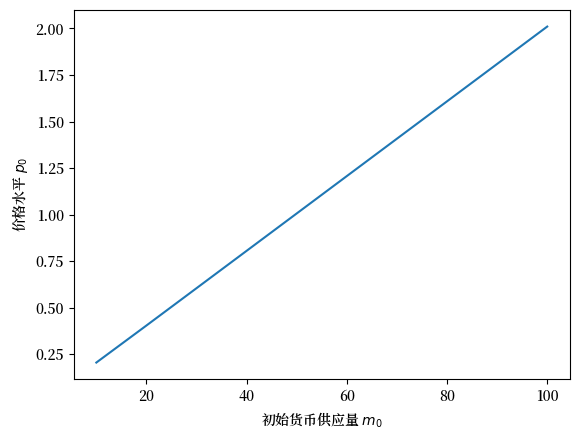

In [7]:
plt.plot(m0_arr, [compute_fixed_point(m0, 1, msm) for m0 in m0_arr])

plt.ylabel('价格水平 $p_0$')
plt.xlabel('初始货币供应量 $m_0$')

plt.show()

现在让我们编写代码来试验前面描述的在时刻 $0$ 的公开市场操作。

In [8]:
def simulate(m0, model, length=15, p0_guess=1):
    # 解包参数
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # (pt, mt, bt, Rt)
    paths = np.empty((4, length))

    # 公开市场操作
    p0 = compute_fixed_point(m0, 1, model)
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g
    g_bar = g + (R_tilde - 1) * BTm1
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    λ = γ2 / γ1

    # t = 0
    paths[0, 0] = p0
    paths[1, 0] = m0

    # 1 <= t <= T
    for t in range(1, T+1, 1):
        paths[0, t] = (1 / γ1) * m0 * \
                      ((1 - λ ** (T - t)) / (1 - λ)
                       + (λ ** (T - t) / (Ru - λ)))
        paths[1, t] = m0

    # t > T
    for t in range(T+1, length):
        paths[0, t] = paths[0, t-1] / Ru
        paths[1, t] = paths[1, t-1] + paths[0, t] * g_bar

    # Rt = pt / pt+1
    paths[3, :T] = paths[0, :T] / paths[0, 1:T+1]
    paths[3, T:] = Ru

    # bt = γ1 - γ2 / Rt
    paths[2, :] = γ1 - γ2 / paths[3, :]

    return paths

In [9]:
def plot_path(m0_arr, model, length=15):

    fig, axs = plt.subplots(2, 2, figsize=(8, 5))
    titles = ['$p_t$', '$m_t$', '$b_t$', '$R_t$']
    
    for m0 in m0_arr:
        paths = simulate(m0, model, length=length)
        for i, ax in enumerate(axs.flat):
            ax.plot(paths[i])
            ax.set_title(titles[i])
    
    axs[0, 1].hlines(model.m0_check, 0, length, color='r', linestyle='--')
    axs[0, 1].text(length * 0.8, model.m0_check * 0.9, r'$\check{m}_0$')
    plt.show()

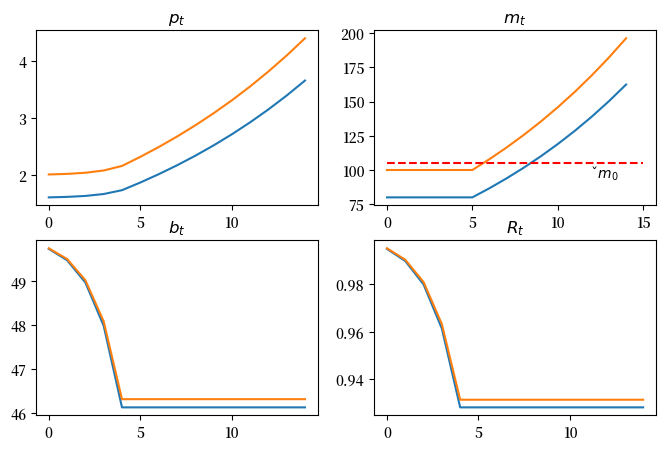

In [10]:
plot_path([80, 100], msm)

{numref}`fig:unpl1` 展示了两个实验的结果，清晰地呈现了{cite}`sargent1981` 论文中的核心观点：

* 在 $t=0$ 时进行的公开市场操作减少了货币供应，从而导致当时的价格水平下降

* 公开市场操作后的货币供应量越低，初始价格水平也就越低

* 然而，减少初始货币供应的公开市场操作也会导致 $t \geq T$ 时期的货币回报率 $R_u$ *降低*。这是因为更高的政府借贷最终需要通过印钞（即征收通货膨胀税）在 $t \geq T$ 时期进行融资

* 货币回报率 $R$ 在维持货币稳定性和应对政府赤字引起的通货膨胀方面扮演着关键角色

* 在某些情况下，政策制定者可能会选择较高的 $R$ 值，以减轻通货膨胀对实际回报率造成的负面影响